In [39]:
from keybert import KeyBERT
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette="pastel")

In [3]:
work_dir = "D:/OneDrive - Otto-Friedrich-Universität Bamberg/Master/Masterarbeit/Data"

In [13]:
tweets_df = pd.read_csv(work_dir + "/Twitter/all_tweets.csv")

In [14]:
print(tweets_df.shape)

(48278, 5)


In [15]:
tweets_df['date'] = pd.to_datetime(tweets_df['date'], errors='coerce')


In [21]:
tweets_df = tweets_df[(tweets_df['date'] > "2020-07-08")]



In [25]:
print(tweets_df.shape)
print(tweets_df["tweet"])

(22452, 5)
0        @kkklawitter @EggMarkus @sepp_reitberger Das e...
1        amperio GmbH: mobileeee und amperio starten la...
2        Zur Ladeinfrastruktur für Elektrofahrzeuge geh...
3        @chris_pyak @JRehborn @HerrPhteven Dazu noch n...
4        @Mingiam10 @kkklawitter Mein Punkt ist ja der ...
                               ...                        
22447    Ich hasse es: Defekter HPC-Lader der @EnBW in ...
22448    Lego-Klavier, Elektro-Ladesäule, Motor-Boot, M...
22449    Lego-Klavier, Elektro-Ladesäule, Motor-Boot, M...
22450    @thestanceman1 Hat er ja Recht. Das ist innova...
22451    Deutsche: wir wollen schnelles, zeitgemäßes In...
Name: tweet, Length: 22452, dtype: object


In [27]:
# calculate Tweet sentiment

analyzer = SentimentIntensityAnalyzer()
def calculate_sentiment(dataframe):
    utf_encoded = dataframe["tweet"].encode('utf-16', 'surrogatepass').decode('utf-16')
    vs = analyzer.polarity_scores(utf_encoded)
    neg_list.append(vs["neg"])
    neu_list.append(vs["neu"])
    pos_list.append(vs["pos"])
    com_list.append(vs["compound"])
    return dataframe

In [28]:
neg_list = []
neu_list = []
pos_list = []
com_list = []
tweets_df = tweets_df.apply(lambda x: calculate_sentiment(x), axis=1)

In [29]:
tweets_df["negative"] = neg_list
tweets_df["neutral"] = neu_list
tweets_df["positive"] = pos_list
tweets_df["compound"] = com_list

In [30]:
print(tweets_df)

       Unnamed: 0                      date             user  \
0               0 2022-04-26 08:44:26+00:00   ReinerKurzmann   
1               1 2022-04-26 08:44:03+00:00  na_presseportal   
2               2 2022-04-26 08:40:02+00:00     SmartHomeEU1   
3               3 2022-04-26 08:32:54+00:00       EPhisoloph   
4               4 2022-04-26 08:26:51+00:00           Amie42   
...           ...                       ...              ...   
22447       22447 2020-08-07 08:20:57+00:00      c_schwarzer   
22448       22448 2020-08-07 07:48:32+00:00      FAZ_Technik   
22449       22449 2020-08-07 07:48:32+00:00          FAZ_NET   
22450       22450 2020-08-07 05:52:55+00:00      HMitterwald   
22451       22451 2020-08-07 05:44:34+00:00    thestanceman1   

                                                   tweet  \
0      @kkklawitter @EggMarkus @sepp_reitberger Das e...   
1      amperio GmbH: mobileeee und amperio starten la...   
2      Zur Ladeinfrastruktur für Elektrofahrzeuge g

In [31]:
def assign_sentiment(row):
    float_compound = float(row['compound'])
    if float_compound >= 0.05:
        val = 'Positive'
    elif float_compound <= -0.05:
        val = 'Negative'
    else:
        val = 'Neutral'
    return val

In [32]:
tweets_df['sentiment'] = tweets_df.apply(assign_sentiment, axis=1)

In [33]:
print(tweets_df)

       Unnamed: 0                      date             user  \
0               0 2022-04-26 08:44:26+00:00   ReinerKurzmann   
1               1 2022-04-26 08:44:03+00:00  na_presseportal   
2               2 2022-04-26 08:40:02+00:00     SmartHomeEU1   
3               3 2022-04-26 08:32:54+00:00       EPhisoloph   
4               4 2022-04-26 08:26:51+00:00           Amie42   
...           ...                       ...              ...   
22447       22447 2020-08-07 08:20:57+00:00      c_schwarzer   
22448       22448 2020-08-07 07:48:32+00:00      FAZ_Technik   
22449       22449 2020-08-07 07:48:32+00:00          FAZ_NET   
22450       22450 2020-08-07 05:52:55+00:00      HMitterwald   
22451       22451 2020-08-07 05:44:34+00:00    thestanceman1   

                                                   tweet  \
0      @kkklawitter @EggMarkus @sepp_reitberger Das e...   
1      amperio GmbH: mobileeee und amperio starten la...   
2      Zur Ladeinfrastruktur für Elektrofahrzeuge g

In [35]:
tweet_sentiment = tweets_df.groupby(['sentiment']).size()

positive = tweet_sentiment['Positive']
neutral = tweet_sentiment['Neutral']
negative = tweet_sentiment['Negative']

labels = ['Positive', 'Neutral', 'Negative' ]
sentiment_count = [positive, neutral, negative]

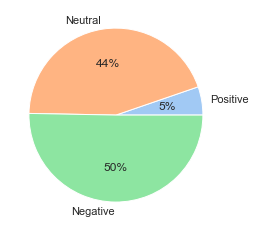

In [40]:
plt.pie(sentiment_count, labels = labels, autopct='%.0f%%')
plt.show()

In [45]:
def get_keywords(dataframe):
    text = dataframe["tweet"].encode('utf-16', 'surrogatepass').decode('utf-16')
    kw_model = KeyBERT(model='paraphrase-multilingual-MiniLM-L12-v2')
    keywords_bert = kw_model.extract_keywords(text,
                                     keyphrase_ngram_range=(1, 3),
                                     highlight=False,
                                     top_n=10)

    keywords = list(dict(keywords_bert).keys())
    
    keyword_list.append(keywords)

In [ ]:
keyword_list = []
tweets_df = tweets_df.apply(lambda x: get_keywords(x), axis=1)

In [ ]:
tweets_df["keywords"] = keyword_list